# TP1 : Regression linéaire

## Q1 :

In [1]:
#%matplotlib inline
from scipy.stats import t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./invest.txt", sep = " ")

In [3]:
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## Q2 :

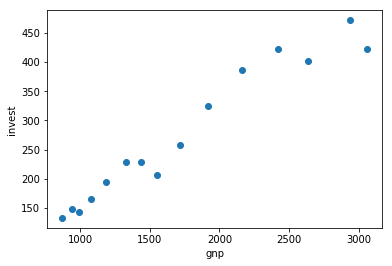

In [4]:
GNP = data["gnp"]
invest = data["invest"]

plt.plot(GNP, invest, 'o')
plt.xlabel("gnp")
plt.ylabel("invest")
plt.show()

In [5]:
GNP = np.log(GNP)
invest = np.log(invest)

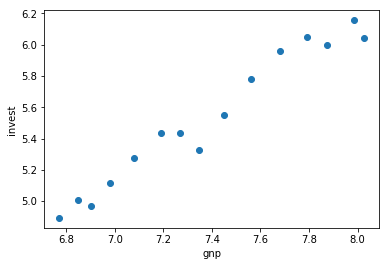

In [6]:
plt.plot(GNP, invest, 'o')
plt.xlabel("gnp")
plt.ylabel("invest")
plt.show()

## Q3

In [7]:
GNPm = GNP.mean()
investm = invest.mean()


slope = np.sum((GNP - GNPm)*(invest - invest.mean()))/np.sum((GNP - GNPm)**2)
intercept = investm - slope * GNPm

print("Slope : ", slope)
print("Intercept : ", intercept)

Slope :  1.015281401598871
Intercept :  -1.9635913352301815


In [8]:
n = 15
sigma2 = np.sum((invest - (intercept + slope * GNP))**2)/(n-2)

var_intercept = sigma2 * (1/15 + (GNPm**2)/np.sum((GNP-GNPm)**2))
var_slope = sigma2/np.sum((GNP-GNPm)**2)

#standart deviation = sqrt(var)
print("Standart variation of intercept : ", np.sqrt(var_intercept))
print("Standart variation of slope : ", np.sqrt(var_slope))

R2 = np.sum((intercept + slope * GNP - investm)**2)/np.sum((invest - investm)**2)

print("Determination coef : ", R2)

Standart variation of intercept :  0.4095472716623081
Standart variation of slope :  0.05538306035485281
Determination coef :  0.9627572956057854


## Q4

In [9]:
value = slope/np.sqrt(var_slope)
p_value = 2 * (1 - t.cdf(value, n-2))

print("Statistic test : ", value, "\np-value : ", p_value)

Statistic test :  18.331984456866678 
p-value :  1.1363709973011282e-10


The p-value is small enough to reject H0 with trust. We can afford to think that the slope != 0.

## Q5

In [10]:
log_prediction = intercept + slope * np.log(1000)
prediction = np.exp(log_prediction)

print("Necessary investment estimation : ", prediction)

Necessary investment estimation :  155.97942793105494


In [11]:
quantile = t.ppf(0.95, n-2)
sigma = np.sqrt(sigma2)
coef = 1/n + ((np.log(1000) - GNPm)**2)/np.sum((GNP - GNPm)**2)
c = np.sqrt(coef)
p = np.sqrt(1+coef)

CI = [0,0]
PI = [0,0]

for i in range(2):
    CI[i] = np.exp(log_prediction + 2*(i-0.5)*quantile*sigma*c)
    PI[i] = np.exp(log_prediction + 2*(i-0.5)*quantile*sigma*p)

print(CI)
print(PI)

[146.67552673421952, 165.8734928682758]
[132.00238933412936, 184.31167845087424]


## Q6

In [12]:
Ci = [[],[]]
Pi = [[],[]]

gnp = [GNP.min() + k/100 * (GNP.max()-GNP.min()) for k in range(101)]

for i in range(101):
    coef = 1/n + ((gnp[i] - GNPm)**2)/np.sum((GNP - GNPm)**2)
    c = np.sqrt(coef)
    p = np.sqrt(1+coef)
    prediction = intercept + slope * gnp[i]
    for j in range(2):
        Ci[j].append(prediction + 2*(j-0.5)*quantile*sigma*c)
        Pi[j].append(prediction + 2*(j-0.5)*quantile*sigma*p)


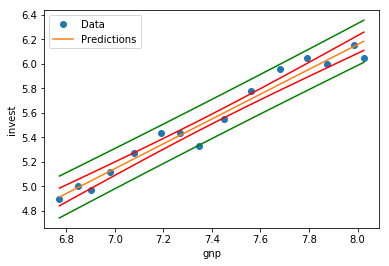

In [13]:
Y_pred = intercept + slope * GNP
plt.plot(GNP, invest, 'o', label = "Data")

plt.plot(GNP, Y_pred, label = "Predictions")
plt.plot(gnp, Ci[0], color = "red")
plt.plot(gnp, Ci[1], color = "red")
plt.plot(gnp, Pi[0], color = "green")
plt.plot(gnp, Pi[1], color = "green")

plt.xlabel("gnp")
plt.ylabel("invest")
plt.legend()
plt.show()

## Q7

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X = np.array([[gnp] for gnp in GNP])
Y = invest
linearReg = LinearRegression().fit(X,Y)

print("slope : ",linearReg.coef_[0])
print("Intercept", linearReg.intercept_)
print("Coef of determination :", linearReg.score(X,Y))
print("Prediction for GNP = 1000 : ", np.exp(linearReg.predict([[np.log(1000)]]))[0])

slope :  1.015281401598871
Intercept -1.9635913352301815
Coef of determination : 0.9627572956057855
Prediction for GNP = 1000 :  155.97942793105494


## Q8

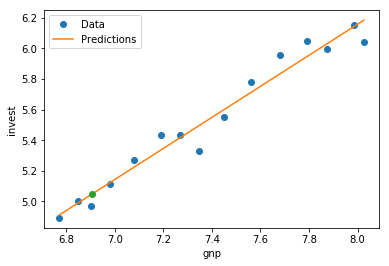

In [16]:
gnps = [GNP.min() + k/100 * (GNP.max()-GNP.min()) for k in range(101)]

Y_pred = linearReg.predict([[gnp] for gnp in gnps])

plt.plot(GNP, invest, 'o', label = "Data")
plt.plot(gnps, Y_pred, label = "Predictions")
plt.plot([np.log(1000)], linearReg.predict([[np.log(1000)]]), 'o')
plt.xlabel("gnp")
plt.ylabel("invest")
plt.legend()
plt.show()

## Q9

In [17]:
X = np.array([[1, GNP[i], data["interest"][i]] for i in range(len(GNP))])
Gram = np.dot(np.transpose(X),X)/n
XtX = np.dot(np.transpose(X),X)

print(Gram)

print("Rank is : ", np.linalg.matrix_rank(Gram))

[[ 1.          7.38352141  7.45266667]
 [ 7.38352141 54.68323179 55.94590287]
 [ 7.45266667 55.94590287 62.92371333]]
Rank is :  3


## Q10

In [18]:
#Compute the coefficient
theta_head = np.dot(np.linalg.inv(XtX), np.dot(np.transpose(X),invest))

In [19]:
#Compute std deviation and determination coef
pred = np.dot(X,theta_head)
sigma2 = np.sum( (invest - pred)**2 )/(n - 3)
C = sigma2 * np.linalg.inv(XtX)

deviations = np.sqrt(np.array([C[0,0],C[1,1], C[2,2]]))
R2 = np.sum((pred - investm)**2)/np.sum((invest - investm)**2)

In [21]:
#Compute p-values
values = theta_head/deviations
p_values = 2 * (1 - t.cdf(np.abs(values), n-3))

In [22]:
#Display the results
Title = ["Intercept :", "GNP coefficient :", "Interest coefficient :"]

print("Determination coefficient :", R2)
print("\n")

for i in range(3):
    print(Title[i])
    print("Estimated value :", theta_head[i])
    print("Standart variation :", deviations[i])
    print("Statistic test :", values[i])
    print("p_value :", p_values[i])
    print("\n")



Determination coefficient : 0.9633108306724567


Intercept :
Estimated value : -2.180454725913023
Standart variation : 0.6623991977962138
Statistic test : -3.2917532707879835
p_value : 0.00643836705089651


GNP coefficient :
Estimated value : 1.0512426913196151
Standart variation : 0.1020613780618992
Statistic test : 10.300102852638801
p_value : 2.5995168484449493e-07


Interest coefficient :
Estimated value : -0.006528879406076271
Standart variation : 0.015344205065601892
Statistic test : -0.42549479612420504
p_value : 0.6780071418834535




Intercept and GNP coefficient have significance in the regression. But the interest coefficient hasn't. It's p_value is high, we cannot reject the hypothesis that its value is 0. Moreover its estimated value is close to 0, meaning that it doesn't effect a lot the regression prediction.

## Q11

In [23]:
x = np.array([1, np.log(1000), 10])
log_pred = np.dot(x,theta_head)
print("Predicted value (Investemnent) :", np.exp(log_pred))
print("Predicted value (log Investemnent) :", log_pred)

Predicted value (Investemnent) : 150.80441472056822
Predicted value (log Investemnent) : 5.0159837304806745


In [24]:
quantile = t.ppf(0.9995, n-3)
sigma = np.sqrt(sigma2)

coef = np.dot(np.dot(x,np.linalg.inv(XtX)),x)
c = np.sqrt(coef)
p = np.sqrt(1+coef)

CI = [0,0]
PI = [0,0]

for i in range(2):
    CI[i] = log_pred + 2*(i-0.5)*quantile*sigma*c
    PI[i] = log_pred + 2*(i-0.5)*quantile*sigma*p

print(CI)
print(PI)

[4.6401840366861515, 5.391783424275197]
[4.473803343638311, 5.558164117323038]


## Q12

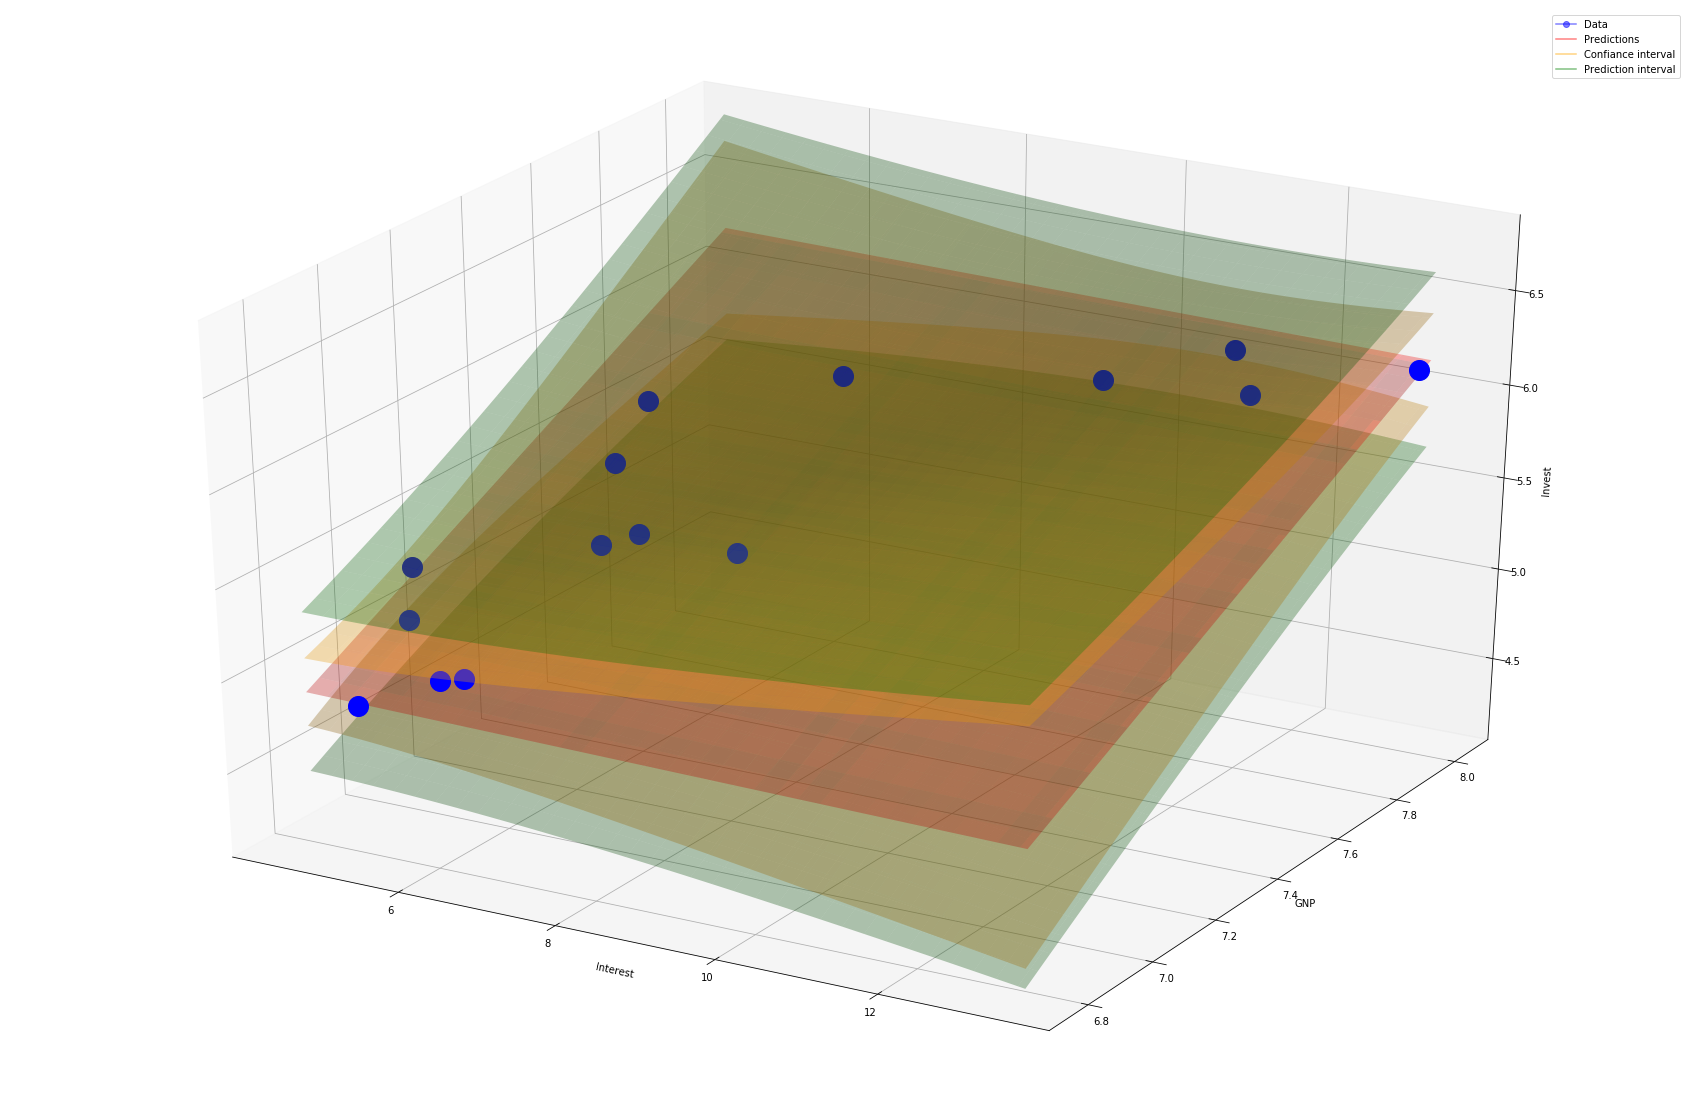

In [87]:
Pred = []
Cinf = []
Csup = []
Pinf = []
Psup = []

gnps = [GNP.min() + k/100 * (GNP.max()-GNP.min()) for k in range(101)]
interests = [data.interest.min() + k/100 * (data.interest.max()-data.interest.min()) for k in range(101)]

gnps, interests = np.meshgrid(gnps,interests)

for i in range(101):
    Pred.append([])
    Cinf.append([])
    Csup.append([])
    Pinf.append([])
    Psup.append([])
    for j in range(101):
        x = np.array([1, gnps[i,j], interests[i,j]])
        coef = np.dot(np.dot(x,np.linalg.inv(XtX)),x)
        c = np.sqrt(coef)
        p = np.sqrt(1+coef)
        
        pred = np.dot(x,theta_head)
        Pred[i].append(pred)
        Cinf[i].append(pred - quantile*sigma*c)
        Csup[i].append(pred + quantile*sigma*c)
        Pinf[i].append(pred - quantile*sigma*p)
        Psup[i].append(pred + quantile*sigma*p)
        
        



# plotting the data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Y, X, np.array(Pred), alpha = 0.3, color = "red")
ax.plot_surface(Y, X, np.array(Cinf), alpha = 0.3, color = "orange")
ax.plot_surface(Y, X, np.array(Csup), alpha = 0.3, color = "orange")
ax.plot_surface(Y, X, np.array(Pinf), alpha = 0.3, color = "green")
ax.plot_surface(Y, X, np.array(Psup), alpha = 0.3, color = "green")


ax.plot(data["interest"], GNP, invest, 'o', marker = 'o', markersize = 20, color = "blue")


redline = mlines.Line2D([], [], color='red', label='Predictions', alpha = 0.5)
greenline = mlines.Line2D([], [], color='green', label='Prediction interval', alpha = 0.5)
orangeline = mlines.Line2D([], [], color='orange', label='Confiance interval', alpha = 0.5)
blueline = mlines.Line2D([], [], marker = 'o', color='blue', label='Data', alpha = 0.5)
ax.legend(handles=[blueline, redline, orangeline, greenline])
ax.set_xlabel('Interest')
ax.set_ylabel('GNP')
ax.set_zlabel('Invest')
fig.set_figheight(20)
fig.set_figwidth(30)
plt.show()

## Q13

In [25]:
X = np.array([[GNP[i], data["interest"][i]] for i in range(len(GNP))])
Y = invest
linearReg = LinearRegression().fit(X,Y)

print("Slopes : ",linearReg.coef_)
print("Intercept", linearReg.intercept_)
print("Coef of determination :", linearReg.score(X,Y))
print("Prediction for GNP = 1000 : ", np.exp(linearReg.predict([[np.log(1000), 10]]))[0])

Slopes :  [ 1.05124269 -0.00652888]
Intercept -2.180454725911396
Coef of determination : 0.9633108306726245
Prediction for GNP = 1000 :  150.80441472087105
